# Actividad evaluable #3
### Sobre conceptos de *machine learning* (ML)

Responde a los planteamientos siguientes sobre las celdas con el hastag TODO<br/>
**Entregad el notebook por auladigital**

# 1.
Imagina que no existiera el método ```train_test_split``` que tiene como función facilitarnos la separación reproducible de muestras para el entreno y el test:
```python
from sklearn.model_selection import train_test_split
x_train, x_test,  y_train, y_test = train_test_split(df_x,df_y, test_size=0.2, random_state = 0)
````

¿Cómo obtendrías los mismos resultados (x_train, x_test,...) sobre un dataframe que te lo han dado ordenado?

In [30]:
# No modifiques este código
###
import pandas as pd
import numpy as np

np.random.seed(2024)
samples = 1000
categories = "A B C D E".split()

data = {
    'feat1': np.random.rand(samples),
    'feat2': np.random.randint(1, 100, size=samples),
    'feat3': np.random.randn(samples),
    'feat4': np.random.choice([True, False], size=samples),
    'feat5': np.random.uniform(0, 1, size=samples),
    'feat6': np.random.choice(categories, size=samples)
}

df = pd.DataFrame(data)
df = df.sort_values(by='feat6').reset_index(drop=True)

print(df.head())
###

      feat1  feat2     feat3  feat4     feat5 feat6
0  0.283789     48  1.354661   True  0.397873     A
1  0.692054     86 -1.726497   True  0.315876     A
2  0.913825     24 -1.144148  False  0.696636     A
3  0.788689     87 -0.198618   True  0.981360     A
4  0.516300     61  0.471752  False  0.836113     A


In [6]:
# TODO
# La variable *df* contiene las muestras pertientes a separar en train y test
# **Atención** Elige el % de muestras que desees: 80%, 70%,... 


# 2.

No resulta viable aplicar ciertas técnicas de ML cuando hay datos categóricos. Con scikit-learn disponemos de diferentes encoders para transformar estas categorias a números:
- OrdinalEncoder: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder
- OneHotEncoder: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder
- LabelEncoder: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder
  
¿Cuál de las anteriores técnicas aplicarías a las categorias siguientes -se consciente de la naturaleza, interpretación y repercursión de dichas etiquetas en el futuro modelo- ? Aplicala. 


In [31]:
# No modifiques esta celda
###
import pandas as pd
import numpy as np


categorias_geograficas = [ # de mayor a menor proximidad geográfica.
    "Muy próximo",
    "Próximo",
    "Cercano",
    "Aledaño",
    "Contiguo",
    "Adyacente",
    "Vecino",
    "Conveniente distancia",
    "Mitad de camino",
    "Lejano"
]

np.random.seed(2024)
samples = 1000

data = {
    'feat1': np.random.rand(samples),
    'feat2': np.random.randint(1, 100, size=samples),
    'feat3': np.random.choice(categorias_geograficas, size=samples)
}

df = pd.DataFrame(data)
print(df.head())
###

      feat1  feat2        feat3
0  0.588015     99       Lejano
1  0.699109     22  Muy próximo
2  0.188152     38     Contiguo
3  0.043809     49      Próximo
4  0.205019     73    Adyacente


In [ ]:
#TODO
# Aplica a la serie feat3 de df el encoder que creas más adecuado
# Comente brevemente tu decisión

# 3. 

Describe con el máximo detalle que puedas el informe de clasificación generado tras entrenar un modelo de predicción:
```python
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
````
```text
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        65
           1       0.93      0.66      0.77        62
           2       0.17      0.01      0.02        93
           3       0.46      0.44      0.45       237
           4       0.69      0.83      0.76       827
           5       0.42      0.27      0.33       341

    accuracy                           0.61      1625
   macro avg       0.52      0.54      0.49      1625
weighted avg       0.57      0.61      0.58      1625
``````


- #TODO

# 4. 
### Aplicación de un modelo de clasificación

Sobre el dataset de ingresos salariales (proporcionado por https://archive.ics.uci.edu/dataset/2/adult) has de entrenar un modelo de clasificación mediante **regresión logística** con tan solo 7 de las 14 características/features que elijas (da igual el criterio). Entrena el modelo y obtén la matriz de confusión.

Nota: ejecuta las siguientes celdas para instalar la librería necesaria para disponer del dataset.

In [10]:
%pip install ucimlrepo


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [15]:
# TODO

# 5.
### Aplicación de un algoritmo de clustering

Aplica uno de los dos algoritmos que desees: DBSCAN o HDBSCAN, a los datos que se generan en las celdas contiguas.<br/>
Calcula el error cometido sabiendo las clases a las que pertenece cada muestra.


Referencias:
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
- https://scikit-learn.org/stable/modules/clustering.html#hdbscan
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.HDBSCAN.html#sklearn.cluster.HDBSCAN
- https://scikit-learn.org/stable/auto_examples/cluster/plot_hdbscan.html


In [19]:
# Para la visualización de los datos
import matplotlib.pyplot as plt
def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))
    labels = labels if labels is not None else np.ones(X.shape[0])
    probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    # The probability of a point belonging to its labeled cluster determines
    # the size of its marker
    proba_map = {idx: probabilities[idx] for idx in range(len(labels))}
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_index = np.where(labels == k)[0]
        for ci in class_index:
            ax.plot(
                X[ci, 0],
                X[ci, 1],
                "x" if k == -1 else "o",
                markerfacecolor=tuple(col),
                markeredgecolor="k",
                markersize=4 if k == -1 else 1 + 5 * proba_map[ci],
            )
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of clusters: {n_clusters_}"
    if parameters is not None:
        parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
        title += f" | {parameters_str}"
    ax.set_title(title)
    plt.tight_layout()

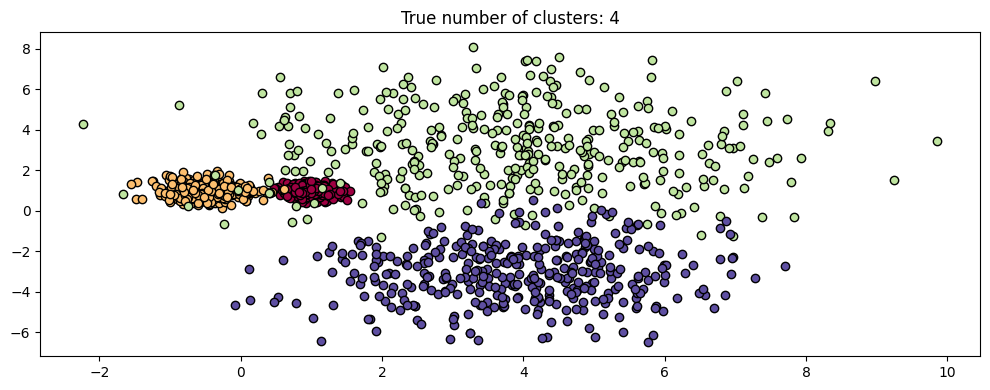

In [28]:
# Datos
from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 2024

centers = [[1, 1], [-0.5, 1], [4, 3], [4, -3]]
X, labels_true = make_blobs(
    n_samples, centers=centers, cluster_std=[0.2, 0.35, 2, 1.5], random_state=0
)
plot(X, labels=labels_true, ground_truth=True)

In [29]:
# TODO
# X y labels_true son las variables necesarias